## Outline : 

Read and store NCS files  

Download NCS

Cross-match HLC nd NCS 

Do stats 


In [9]:
# Imports 
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import hstack
from astropy.table import vstack
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import os
import numpy as np

In [ ]:
# Load the NSC data ... if it's taking too long ,
# take the route below ... 
table_neg = Table.read('NSC_stripe82_Dec_negative.csv')
table_pos = Table.read('NSC_stripe82_Dec_positive.csv')

In [2]:
# ASIDE : In pandas one can limit the number of rows , 
# one can then convert the df to table for ease of use 
import pandas as pd
df = pd.read_csv('NSC_stripe82_Dec_negative.csv', nrows=2000000)
table_neg = Table.from_pandas(df)

df = pd.read_csv('NSC_stripe82_Dec_positive.csv', nrows=2000000)
table_pos = Table.from_pandas(df)

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Stack the two tables vertically 
# ( rows over rows,  since the columns ARE IDENTICAL )
# this is even faster than any other merge, etc. 
nsc = vstack([table_neg, table_pos])

In [4]:
print('Done')

Done


In [17]:
from astropy.io import fits
# Read in the HLC data : 
catalogs = ['HLC.RA_20_to_21.fits.gz',
'HLC.RA_21_to_22.fits.gz',
'HLC.RA_22_to_23.fits.gz',
'HLC.RA_23_to_24.fits.gz',
'HLC.RA_00_to_01.fits.gz',
'HLC.RA_01_to_02.fits.gz',
'HLC.RA_02_to_03.fits.gz',
'HLC.RA_03_to_04.fits.gz']


def ReadTable(name):
    dir_hlc = '../HW_1/'
    hlc_fits = fits.open(dir_hlc+name)
    hlc_table = Table(hlc_fits[1].data)
    return hlc_table

hlc = ReadTable(catalogs[1])
''' 
for catalog in catalogs[1:] : 
    print('Reading ', catalog)
    hlc_cat = ReadTable(catalog)
    hlc = vstack([hlc, hlc_cat])
'''

" \nfor catalog in catalogs[1:] : \n    print('Reading ', catalog)\n    hlc_cat = ReadTable(catalog)\n    hlc = vstack([hlc, hlc_cat])\n"

In [10]:
# plot the coverage of HLC vs NSC ..

np.ravel(hlc.colnames)

array(['LC_NAME', 'IAU_NAME', 'N_GOOD_EPOCHS', 'MEAN_PSFMAG',
       'MEAN_PSFMAG_ERR', 'MEAN_EXPMAG', 'MEAN_EXPMAG_ERR', 'RMS_PSFMAG',
       'RMS_EXPMAG', 'CHISQ_PSFMAG', 'CHISQ_EXPMAG',
       'N_GOOD_EPOCHS_PSF_CLIP', 'N_GOOD_EPOCHS_EXP_CLIP',
       'MEAN_PSFMAG_CLIP', 'MEAN_PSFMAG_ERR_CLIP', 'MEAN_EXPMAG_CLIP',
       'MEAN_EXPMAG_ERR_CLIP', 'RMS_PSFMAG_CLIP', 'RMS_EXPMAG_CLIP',
       'CHISQ_PSFMAG_CLIP', 'CHISQ_EXPMAG_CLIP', 'MEAN_PSFMAG_ITER',
       'MEAN_PSFMAG_ERR_ITER', 'MEAN_EXPMAG_ITER', 'MEAN_EXPMAG_ERR_ITER',
       'PERCENTILE_05_PSF', 'PERCENTILE_50_PSF', 'PERCENTILE_95_PSF',
       'PERCENTILE_05_EXP', 'PERCENTILE_50_EXP', 'PERCENTILE_95_EXP',
       'TIME_SPAN', 'MEAN_OBJECT_TYPE', 'MEAN_CHILD', 'REDDENING',
       'RA_MEAN', 'RA_MEAN_ERR', 'RA_PM', 'RA_PM_ERR', 'RA_MEAN_CLIP',
       'RA_MEAN_ERR_CLIP', 'RA_PM_CLIP', 'RA_PM_ERR_CLIP', 'RA_CHISQ_CON',
       'RA_CHISQ_CON_CLIP', 'RA_CHISQ_LIN', 'RA_CHISQ_LIN_CLIP',
       'DEC_MEAN', 'DEC_MEAN_ERR', 'DEC_PM', 'DEC_

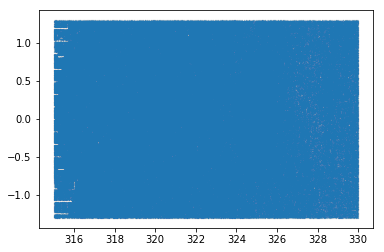

In [20]:
ra =nsc['ra']
m = (315<ra)*(ra<332)
plt.scatter(nsc['ra'][m], nsc['dec'][m], s=0.001)

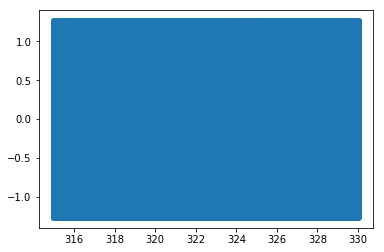

In [19]:
%matplotlib inline
plt.scatter(hlc['RA_MEAN'], hlc['DEC_MEAN'])

In [21]:
# Match the HLC into NSC, as we see that it is a subset ...
m = (315<nsc['ra'])*(nsc['ra']<332)
hlc_coords = SkyCoord(ra = hlc['RA_MEAN']*u.degree, dec= hlc['DEC_MEAN']*u.degree) 
nsc_coords = SkyCoord(ra = nsc['ra'][m]*u.degree, dec= nsc['dec'][m]*u.degree) 

# this is matching HLC to NSC, so that indices are into NSC catalog
# makes sense in this case since the NSC catalog is bigger than HLC here 
idx, d2d, d3d = hlc_coords.match_to_catalog_sky(nsc_coords)  

# object separation is an object with units, 
# I add that as a column so that one can 
# select based on separation to the nearest matching object
hlc_nsc = hstack([hlc, nsc[idx]], table_names = ['hlc', 'nsc'])
hlc_nsc['sep_2d_arcsec'] = d2d.arcsec


(array([  7.06209000e+05,   7.85910000e+04,   9.51300000e+03,
          3.04700000e+03,   1.64100000e+03,   8.13000000e+02,
          5.11000000e+02,   3.92000000e+02,   3.66000000e+02,
          2.89000000e+02]),
 array([  6.36612167e-06,   1.99963792e-01,   3.99921218e-01,
          5.99878645e-01,   7.99836071e-01,   9.99793497e-01,
          1.19975092e+00,   1.39970835e+00,   1.59966578e+00,
          1.79962320e+00,   1.99958063e+00]),
 <a list of 1 Patch objects>)

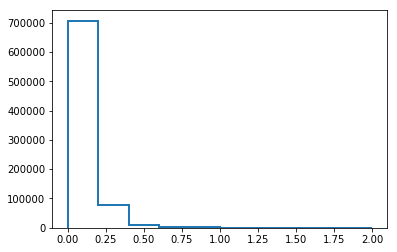

In [23]:
# plot the separation histogram ....
# there is a clean peak close to zero : 
# these are the matched sources 
plt.hist(hlc_nsc['sep_2d_arcsec'][hlc_nsc['sep_2d_arcsec']<2], histtype='step', lw=2 )

In [24]:
#  select matched sources 
matched = hlc_nsc['sep_2d_arcsec'] < 0.5 
selected =  hlc_nsc[matched]

In [26]:
# How many of the hlc sources had a good match ? 
print(len(hlc), len(selected))

844981 791209


In [31]:
def FormatMagnitude(table):
    mean_psfmag = Table(table['MEAN_PSFMAG'], names=('u', 'g', 'r', 'i','z'))
    mean_psfmag_err = Table(table['MEAN_PSFMAG_ERR'], names=('u', 'g', 'r', 'i','z'))
    SN = {} #a dictionary
    for f in mean_psfmag.colnames : 
        SN[f] = mean_psfmag[f] / mean_psfmag_err[f]
    return mean_psfmag, mean_psfmag_err, SN

mean_psfmag, mean_psfmag_err, SN = FormatMagnitude(selected)

In [54]:
# select only high signal to noise :
mSN = (SN['g'] > 5) * ( SN['r'] > 5) * ( SN['i'] > 5 )
m_r = mean_psfmag['r'].data.data > 10.0
m = mSN * m_r

# select only matches within 1 mag ...


In [58]:
#selected

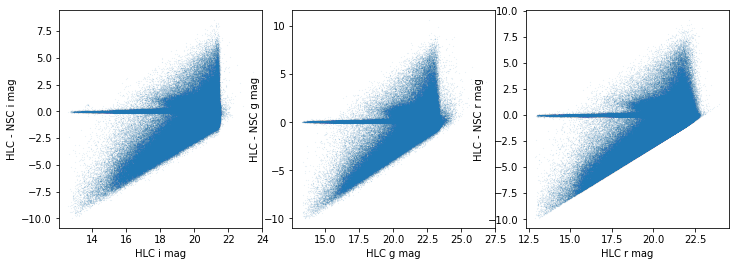

In [64]:
fig,ax = plt.subplots(1,3, figsize=(12,4))
i = 0 
for c in 'igr' : 
    mag1 = mean_psfmag[c][m]
    mag2 = selected[c+'mag'][m] 
    dmag  = mag1 - mag2
    m1 = dmag > -10
    m2 = mag1>10
    mask = m1*m2 
    ax[i].scatter(mag1[mask] , dmag[mask],  s=0.001 )
    ax[i].set_xlabel('HLC '+c+' mag')
    ax[i].set_ylabel('HLC - NSC '+c+ ' mag')
    i += 1 
fig.subplots_adjust(wspace=0.15)

In [60]:
#mag1

In [52]:
len(mag1.data.data)

677371